In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv('data/산불데이터에코드매핑+좌표.csv')
df.head()

,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,...,발생장소_읍면동,발생장소_시도_시군구,발생장소_시도_시군구_읍면동,CTPRVN_CD,SIG_CD,EMD_CD,매핑수준,매핑방법,경도,위도
0,2024,9,29,15:41,일,2024,9,30,16:30,전북,...,산동,전북 남원,전북 남원 산동,45,45190,45190410,완전 매칭,"시도,시군구,읍면동",127.480835,35.501992
1,2024,9,10,15:55,화,2024,9,10,18:00,경남,...,내이,경남 밀양,경남 밀양 내이,48,48270,48270102,완전 매칭,"시도,시군구,읍면동",128.743643,35.497002
2,2024,9,10,14:35,화,2024,9,10,17:52,충남,...,규암,충남 부여,충남 부여 규암,44,44760,44760310,완전 매칭,"시도,시군구,읍면동",126.865710,36.283090
3,2024,9,10,14:24,화,2024,9,10,22:00,경북,...,화동,경북 상주,경북 상주 화동,47,47250,47250400,완전 매칭,"시도,시군구,읍면동",127.972443,36.398004
4,2024,9,5,13:51,목,2024,9,5,16:10,경북,...,녹전,경북 안동,경북 안동 녹전,47,47170,47170430,완전 매칭,"시도,시군구,읍면동",128.767307,36.751290


In [30]:
# KMeans++ 클러스터링 (k=31 (헬기 총 대수))
coords = df[["위도", "경도"]]
k = 31
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['cluster'] = kmeans_plus.fit_predict(coords)
centers = kmeans_plus.cluster_centers_


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# 평균 거리
avg_distances = []

for i in range(k):
    cluster_points = df[df['cluster'] == i][["위도", "경도"]].values
    center = centers[i]
    # 거리 계산 (유클리드 거리)
    dists = np.sqrt(np.sum((cluster_points - center) ** 2, axis=1))
    avg_dist = np.mean(dists)
    avg_distances.append({
        'cluster': i,
        'center_lat': center[0],
        'center_lon': center[1],
        'num_fires': len(cluster_points),
        'avg_distance': avg_dist
    })

# DataFrame으로 정리
df_cluster_summary = pd.DataFrame(avg_distances)
df_cluster_summary = df_cluster_summary.sort_values(by='avg_distance', ascending=False)

In [18]:
df_cluster_summary.head(31)

,cluster,center_lat,center_lon,num_fires,avg_distance
19,19,34.366758,126.337042,17,0.462281
2,2,36.768977,128.706166,48,0.240110
14,14,37.878657,127.901096,40,0.239543
1,1,35.235155,128.581300,57,0.238518
18,18,35.985850,127.310752,52,0.236520
8,8,38.115512,128.511045,23,0.235386
3,3,35.217389,126.712996,45,0.230390
25,25,37.543428,128.745041,49,0.227711
29,29,37.305971,128.111274,43,0.224484
20,20,35.228776,128.028130,64,0.223071


In [31]:
df_cluster_summary['avg_distance'].describe()

count    31.000000
mean      0.207903
std       0.059636
min       0.056843
25%       0.183913
50%       0.206058
75%       0.226098
max       0.462281
Name: avg_distance, dtype: float64

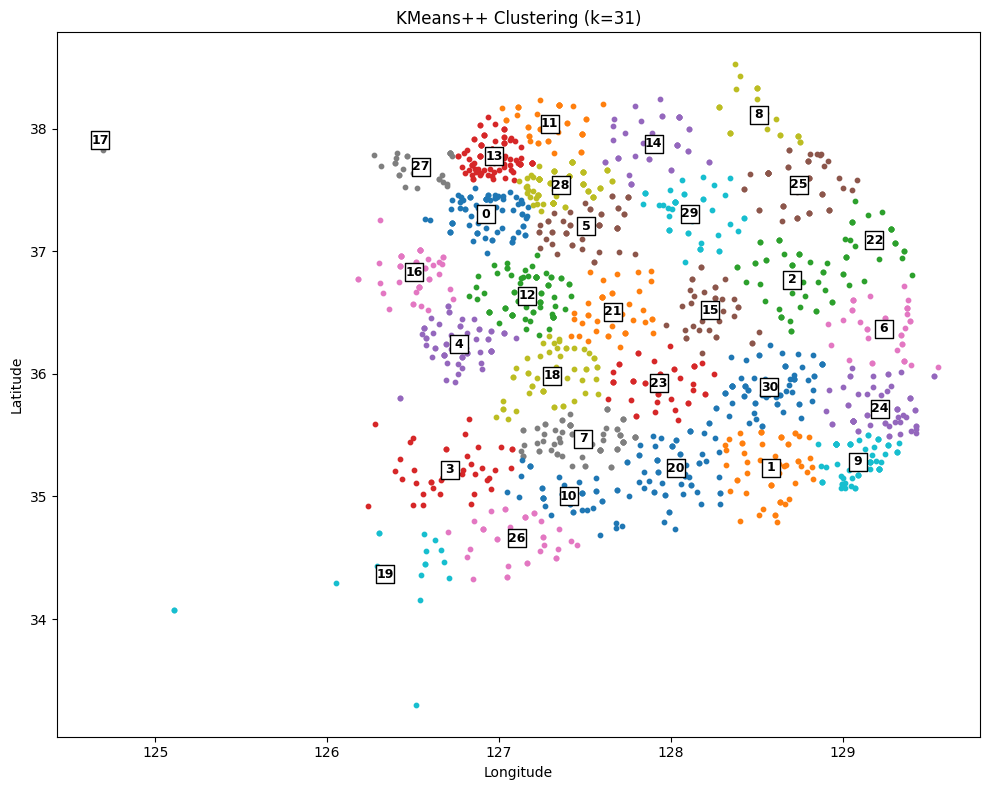

In [32]:
# 시각화
plt.figure(figsize=(10, 8))

for i in range(k):
    cluster_points = df[df['cluster'] == i]
    plt.scatter(cluster_points["경도"], cluster_points["위도"], s=10)

plt.scatter(centers[:, 1], centers[:, 0], c='white', edgecolors='black', marker='s', s=150, label='Centers')

# 중심점 위에 클러스터 번호 텍스트 표시
for i, (lat, lon) in enumerate(centers):
    plt.text(lon, lat, str(i), fontsize=9, color='black', ha='center', va='center', fontweight='bold')

plt.title(f'KMeans++ Clustering (k={k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.show()

In [33]:

# KMeans++ 클러스터링 (k=16 (헬기 보유 기관 수(중앙119 제외)))
coords = df[["위도", "경도"]]
k = 16
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['cluster'] = kmeans_plus.fit_predict(coords)
centers = kmeans_plus.cluster_centers_


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
# 평균 거리
avg_distances = []

for i in range(k):
    cluster_points = df[df['cluster'] == i][["위도", "경도"]].values
    center = centers[i]
    # 거리 계산 (유클리드 거리)
    dists = np.sqrt(np.sum((cluster_points - center) ** 2, axis=1))
    avg_dist = np.mean(dists)
    avg_distances.append({
        'cluster': i,
        'center_lat': center[0],
        'center_lon': center[1],
        'num_fires': len(cluster_points),
        'avg_distance': avg_dist
    })

# DataFrame으로 정리
df_cluster_summary = pd.DataFrame(avg_distances)
df_cluster_summary = df_cluster_summary.sort_values(by='avg_distance', ascending=False)

In [35]:
df_cluster_summary.head(31)

,cluster,center_lat,center_lon,num_fires,avg_distance
7,7,34.908680,126.613537,66,0.438012
5,5,37.853771,128.394401,82,0.384160
3,3,37.098171,128.791880,91,0.361658
10,10,36.396876,127.924275,96,0.355286
14,14,36.327105,129.115381,72,0.325964
6,6,36.390201,127.073843,146,0.320213
11,11,35.197695,128.234711,95,0.310347
0,0,35.562416,127.464289,127,0.294998
8,8,37.380216,127.558375,142,0.290706
12,12,34.842925,127.322664,68,0.270278


In [36]:
df_cluster_summary['avg_distance'].describe()

count    16.000000
mean      0.291090
std       0.084312
min       0.056843
25%       0.257347
50%       0.292852
75%       0.333295
max       0.438012
Name: avg_distance, dtype: float64

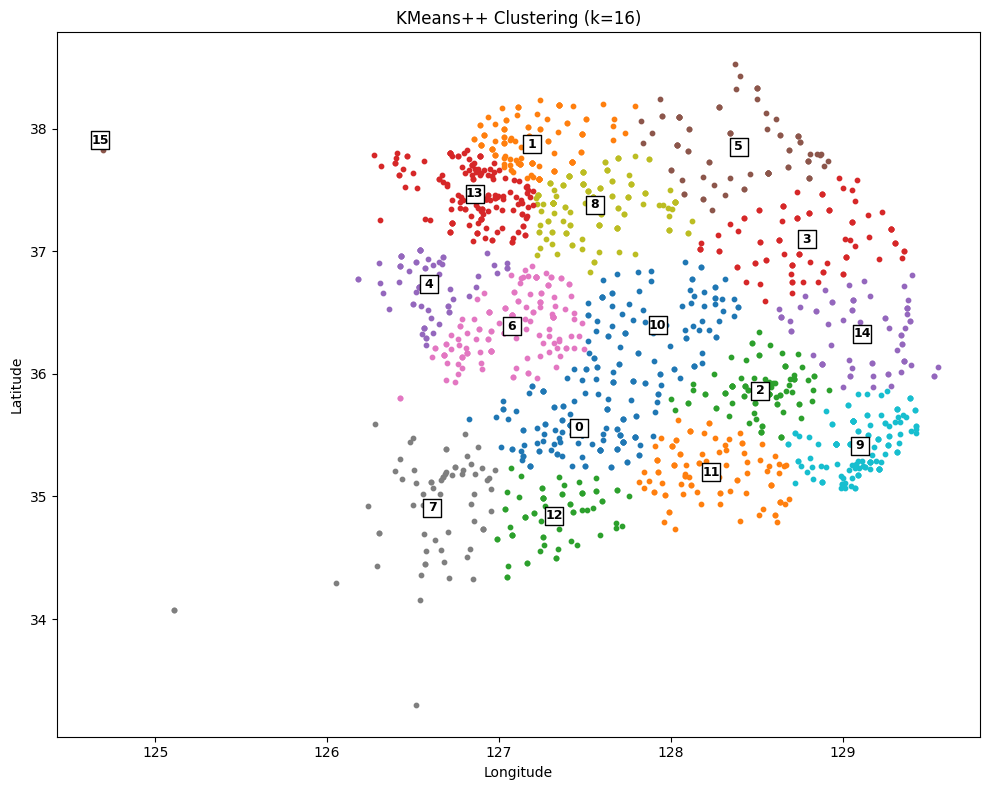

In [37]:
# 시각화
plt.figure(figsize=(10, 8))

for i in range(k):
    cluster_points = df[df['cluster'] == i]
    plt.scatter(cluster_points["경도"], cluster_points["위도"], s=10)

plt.scatter(centers[:, 1], centers[:, 0], c='white', edgecolors='black', marker='s', s=150, label='Centers')

# 중심점 위에 클러스터 번호 텍스트 표시
for i, (lat, lon) in enumerate(centers):
    plt.text(lon, lat, str(i), fontsize=9, color='black', ha='center', va='center', fontweight='bold')

plt.title(f'KMeans++ Clustering (k={k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.show()